In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import rheofit
import numpy as np
import matplotlib
import altair as alt
import io
import json
import requests

# Sharing figure data

Some tests on how to share figures data. This is not intended as a general solution to share data but specifically to share a figure and the data used to generate it at the same time.

Initial scope is to find a good way to share data digitized from literture articles on github.

# Example figure

## Data description:

```
Fig2_Dekker2018:
  figure_number: 2
  title: Scaling of flow curves Comparison between experiments and simulations
  year: 2018
  doi: 10.1016/j.jnnfm.2018.08.006
  author: Riande I. Dekker and Maureen Dinkgreve and Henri de Cagny and Dion J. Koeze and Brian P. Tighe and Daniel Bonn
  sample: castor oil concentrated emuslions
  unit_x: s-1
  unit_y: Pa
  solvent_viscosity: 0.00089 #Pa.s for water at 25°C
```

## Figure image

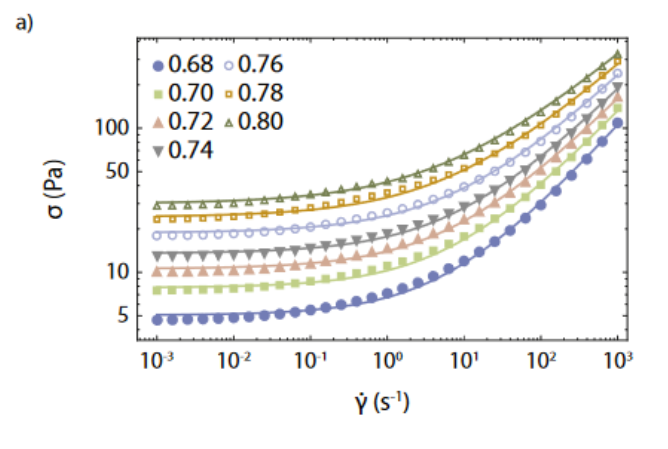!

In [2]:
description_dict={'name':'Fig2_Dekker2018',
                  'figure_number': 2,
                  'title': 'Scaling of flow curves Comparison between experiments and simulations',
                  'year': 2018,
                  'doi': '10.1016/j.jnnfm.2018.08.006',
                  'author': 'Riande I. Dekker and Maureen Dinkgreve and Henri de Cagny and Dion J. Koeze and Brian P. Tighe and Daniel Bonn',
                  'sample': 'castor oil concentrated emuslions',
                  'unit_x': 's-1',
                  'unit_y': 'Pa',
                  'solvent_viscosity': '0.00089'}

## Digitized data

There are different ways to represent the data

* Native from the digitizer tool: some information about the sample are in the colum title
* Wide
* Long

In [12]:
data_string='''
0.68,,0.70,,0.72,,0.74,,0.76,,0.78,,0.80,
0.000984118755381915,4.6944715978543,0.000984118755381915,7.490981859884686,0.000984118755381915,9.915393703344993,0.000984118755381915,13.124452058658024,0.000984118755381915,17.820607675742046,0.000984118755381915,23.38857110964297,0.001,28.679037751284174
0.0015908244161760207,4.6944715978543,0.0015655601444783055,7.554901080082761,0.0015908244161760207,9.915393703344993,0.0015655601444783055,13.236440681352315,0.0016164963907822857,18.12602534956567,0.0015908244161760207,23.588141640561147,0.0015908244161760207,28.436395033707626
0.002490531302828147,4.734528691755933,0.0025307223231017745,7.554901080082761,0.002490531302828147,9.915393703344993,0.002490531302828147,13.124452058658024,0.002490531302828147,17.972667761775526,0.002490531302828147,23.78941507143948,0.002490531302828147,28.923750896153724
0.0038990765462833723,4.774927585738452,0.004025934862151999,7.554901080082761,0.003961998005789687,9.915393703344993,0.003961998005789687,13.124452058658024,0.0038990765462833723,18.12602534956567,0.0038990765462833723,23.78941507143948,0.0038990765462833723,29.170552134905357
0.006202746170366861,4.774927585738452,0.006302843164450931,7.619365711655093,0.006302843164450931,10.085328227185236,0.006302843164450931,13.349384883110554,0.006302843164450931,18.436677410295804,0.006404555476645642,24.197128879237074,0.006302843164450931,29.419459284873938
0.010026716797336674,4.898204358009313,0.010026716797336674,7.749949864227672,0.009867480055161899,10.171384545005933,0.009867480055161899,13.463292817719474,0.010026716797336674,18.593994310156464,0.010026716797336674,24.40359869026086,0.010026716797336674,29.67049031542659
0.015697428197881457,4.939999867435308,0.015697428197881457,7.816078812496569,0.015697428197881457,10.345706356238557,0.015448133500796062,13.694032849104119,0.015697428197881457,18.912666635625374,0.0159507458952854,24.821838656064635,0.0159507458952854,30.69621802490234
0.02497185204835972,5.024663830396283,0.02537483602643943,8.01787055708703,0.02497185204835972,10.433984434474233,0.02497185204835972,13.810881603707163,0.02497185204835972,19.23680051224492,0.02497185204835972,25.46267688793377,0.02537483602643943,31.48871814371774
0.03972583195566586,5.15438817231248,0.04036690870732276,8.155284466821307,0.03909493630072096,10.703364000951472,0.03972583195566586,14.1674442689516,0.03972583195566586,19.566489542561023,0.03972583195566586,25.899067817240933,0.04036690870732276,32.028386106905856
0.06319682342797872,5.332578647681401,0.06319682342797872,8.50921111855231,0.06219317921603307,10.886803117885067,0.06319682342797872,14.288332559273126,0.06319682342797872,20.071647711384955,0.06319682342797872,27.023047047248458,0.06219317921603307,32.85527949730974
0.09893842801647644,5.470252585508258,0.09893842801647644,8.728897817969395,0.10053504973399342,11.359273427319845,0.09893842801647644,14.782289297852223,0.10053504973399342,20.58984780962472,0.10053504973399342,28.19580522630554,0.10053504973399342,33.99110739313115
0.15739366698668422,5.6593626944123185,0.1548940596599311,8.878497636062988,0.1599336117983068,11.751970729927454,0.15739366698668422,15.42381764396852,0.1599336117983068,21.48341515538178,0.15739366698668422,28.923750896153724,0.1599336117983068,35.7688959270297
0.2503856883938947,5.9553562903530155,0.2503856883938947,9.342857067283756,0.2503856883938947,12.366617336545469,0.2503856883938947,16.093187321733673,0.2503856883938947,22.415761933060146,0.24640925202764388,30.436508692062173,0.254426294615964,36.69235999185589
0.3983196665580481,6.266830818258798,0.39199385449724533,9.831503229233347,0.3983196665580481,12.685892685078827,0.39199385449724533,16.934886403895412,0.3983196665580481,23.588141640561147,0.3983196665580481,32.3016786475165,0.39199385449724533,38.28475130191496
0.6336566510036348,6.707617138020451,0.623593394725169,10.433984434474233,0.623593394725169,13.463292817719474,0.623593394725169,17.820607675742046,0.6336566510036348,24.61183027157886,0.623593394725169,33.70352122155761,0.6336566510036348,40.287104184994504
0.9920275980948887,7.179406780725326,0.9920275980948887,10.97969827886145,0.9920275980948887,14.288332559273126,1.0080364718889088,18.752653567234276,0.9920275980948887,25.899067817240933,0.9920275980948887,35.7688959270297,0.9920275980948887,42.394183282350795
1.5781417245697997,7.749949864227672,1.5781417245697997,11.751970729927454,1.5781417245697997,15.555426345567348,1.5781417245697997,20.24291552297486,1.5781417245697997,27.720715013325755,1.5781417245697997,37.3212103340957,1.6036090318768075,44.23402484802961
2.5105463876317677,8.581818708501402,2.5105463876317677,12.90330927966146,2.5105463876317677,16.79160660160473,2.5105463876317677,21.48341515538178,2.5105463876317677,29.923663349259808,2.5510604019100134,40.63086690284775,2.5105463876317677,47.7492758573845
3.9938384913871285,9.422578010323393,3.9938384913871285,14.04757876968538,3.9304113653402823,18.12602534956567,3.9304113653402823,23.588141640561147,4.058289174498258,32.3016786475165,3.9938384913871285,43.12075406362518,3.9938384913871285,52.427264194820545
6.353495786362242,10.612806801964368,6.353495786362242,15.822022312228178,6.353495786362242,20.24291552297486,6.353495786362242,26.12005997150047,6.252594365599045,35.466268545047285,6.252594365599045,47.34528691755933,6.353495786362242,57.563554244528596
9.946779781239567,11.953381345574615,9.946779781239567,17.669834113783413,10.107296225016489,22.607031655735586,9.946779781239567,28.923750896153724,10.107296225016489,38.94089277016936,9.946779781239567,53.32578647681404,10.107296225016489,63.203045746379836
15.823580138321864,13.928727408018121,16.078933616279972,20.415644732438466,15.572281991411288,26.12005997150047,15.823580138321864,33.41836821007866,16.078933616279972,43.859777145175876,15.823580138321864,58.55010459984086,16.078933616279972,71.79406780725327
25.172537635360328,16.230507636126017,25.172537635360328,23.588141640561147,25.172537635360328,29.923663349259808,25.172537635360328,37.63966560551727,25.172537635360328,50.246638303962825,24.77276640751525,66.50866473477694,24.77276640751525,80.86285625130726
40.045087487441045,19.566489542561023,40.045087487441045,27.957250960165194,40.045087487441045,34.57366244061312,40.045087487441045,43.859777145175876,40.045087487441045,58.05473384794524,40.045087487441045,76.8438040850024,39.40912165730034,93.42857067283752
62.69299295248452,23.78941507143948,63.70470292292601,33.41836821007866,62.69299295248452,41.67985498411422,62.69299295248452,51.5438817231248,63.704702922925875,67.9365238099866,62.69299295248452,89.54256282398347,63.70470292292601,108.86803117885067
99.73354391196347,29.419459284873938,98.14965110446916,40.287104184994504,98.14965110446916,50.246638303962825,99.73354391196347,63.203045746379836,101.3429968350305,80.17870557087028,98.14965110446916,104.33984434474237,99.73354391196347,127.94139158386832
161.21891377361555,36.38191952241156,158.65855676691498,50.246638303962825,156.1388614161468,62.13809483529163,161.21891377361555,76.8438040850024,158.65855676691498,97.0699645118066,158.65855676691498,125.7856204509409,158.65855676691498,150.35634890398066
256.4709843804439,47.34528691755933,252.39790594005729,62.668308182588014,244.44477843734114,76.8438040850024,256.4709843804439,95.02979198036937,252.39790594005729,119.53381345574621,256.4709843804439,151.63931297378286,252.39790594005729,181.26025349565677
401.52075136114144,61.0910880031578,401.52075136114144,80.86285625130726,395.14410208953825,95.02979198036937,401.52075136114144,117.5197072992746,401.52075136114144,147.82289297852225,395.14410208953825,185.93994310156475,395.14410208953825,214.8341515538178
649.0568453994766,80.17870557087028,638.749014866643,104.33984434474237,618.6218575570459,123.66617336545463,638.749014866643,151.63931297378286,633.6566510036336,184.36677410295803,638.749014866643,231.90689071079063,628.6048855119857,261.20059971500467
1016.1375286582388,107.94693908463428,1016.1375286582388,136.9403284910411,1000,159.57028823666954,1016.1375286582388,197.3344692905154,1016.1375286582388,237.89415071439467,1016.1375286582388,289.2375089615371,1016.1375286582388,317.5740579327164'''

native_data=pd.read_csv(io.StringIO(data_string), names=['068_shear_rate','068_stress',
                                                    '070_shear_rate','070_stress',
                                                    '072_shear_rate','072_stress',
                                                    '074_shear_rate','074_stress',
                                                    '076_shear_rate','076_stress',
                                                    '078_shear_rate','078_stress',
                                                    '080_shear_rate','080_stress'],
                skiprows=[1],
                )

native_data.head()

,068_shear_rate,068_stress,070_shear_rate,070_stress,072_shear_rate,072_stress,074_shear_rate,074_stress,076_shear_rate,076_stress,078_shear_rate,078_stress,080_shear_rate,080_stress
0,0.000984,4.694472,0.000984,7.490982,0.000984,9.915394,0.000984,13.124452,0.000984,17.820608,0.000984,23.388571,0.001000,28.679038
1,0.001591,4.694472,0.001566,7.554901,0.001591,9.915394,0.001566,13.236441,0.001616,18.126025,0.001591,23.588142,0.001591,28.436395
2,0.002491,4.734529,0.002531,7.554901,0.002491,9.915394,0.002491,13.124452,0.002491,17.972668,0.002491,23.789415,0.002491,28.923751
3,0.003899,4.774928,0.004026,7.554901,0.003962,9.915394,0.003962,13.124452,0.003899,18.126025,0.003899,23.789415,0.003899,29.170552
4,0.006203,4.774928,0.006303,7.619366,0.006303,10.085328,0.006303,13.349385,0.006303,18.436677,0.006405,24.197129,0.006303,29.419459


In [42]:
single_data_table_list=[]
for label_x, label_y in zip(native_data.columns[::2],native_data.columns[1::2]):
    col_shear_rate=native_data[label_x]
    col_shear_rate.name=''.join(label_x.split('_')[1:])
    col_stress=data[label_y]
    col_stress.name=''.join(label_y.split('_')[1:])
    col_vol_frac=col_stress.apply(lambda x : str(int(label_x.split('_')[0])/100))
    col_vol_frac.name='vol_frac'
    col_viscosity=col_stress/col_shear_rate
    col_viscosity.name='viscosity'
    single_data_table_list.append(pd.concat([col_vol_frac, col_shear_rate,col_stress, col_viscosity], axis=1))

wide_data=pd.concat(single_data_table_list) 
wide_data.head()

,vol_frac,shearrate,stress,viscosity
0,0.68,0.000984,4.694472,4770.228768
1,0.68,0.001591,4.694472,2950.967781
2,0.68,0.002491,4.734529,1901.011518
3,0.68,0.003899,4.774928,1224.630378
4,0.68,0.006203,4.774928,769.808639


In [43]:
long_data=wide_data.melt(id_vars=['vol_frac','shearrate'])
long_data.head()

,vol_frac,shearrate,variable,value
0,0.68,0.000984,stress,4.694472
1,0.68,0.001591,stress,4.694472
2,0.68,0.002491,stress,4.734529
3,0.68,0.003899,stress,4.774928
4,0.68,0.006203,stress,4.774928


# Data Format discussion

https://altair-viz.github.io/user_guide/data.html

very good discussion at the link above on wide vs long format and how to go from one to another with pandas and altair

### wide form

has one row per independent variable, with metadata recorded in the row and column labels 
this is the form Altair does not really like 

### Long form

Every raw is an observation that contains all the information to treat it as a single experiment. In this case we have two independent variable:

* Volume fraction
* Shear rate

And for every observation we add:

* Stress
* Viscosity
* ... all the other variable measured during the experiments

the table will then be:

| vol_fra |shearrate | variable | value |
----------|----------|----------|-------|
| 0.68    |  1000    | Stress   | 500   |
| 0.68    |  1000    | Viscosity   | 0.5   |

In this format if I want to add an independent variable I will add a column and will define for each observation.
If I want to add a measured variable for some or all the observation I'll just add raws, no need to add columns.

## Altair plot

In [44]:
#Using the wide I need to decide what Y I wnat to plot

wide_figure=alt.Chart(wide_data).mark_circle(size=100).encode(
        alt.X('shearrate', scale=alt.Scale(type='log')),
        alt.Y('stress', scale=alt.Scale(type='log')),
        color='vol_frac',
        tooltip=['vol_frac']
    )

wide_figure

alt.Chart(...)

In [47]:
# Using the long form I can plot every y and decide later what to look at adding interactivity but I need to pass a long dataset

long_figure=alt.Chart(long_data).mark_circle(size=100).encode(
        alt.X('shearrate', scale=alt.Scale(type='log')),
        alt.Y('value', scale=alt.Scale(type='log')),
        color='vol_frac',
        shape='variable',
        tooltip=['vol_frac']
    )

long_figure

alt.Chart(...)

In [51]:
# A mixed approach I pass the wide which is easier to read and I transform to long before encoding

long_from_wide_figure=alt.Chart(wide_data, description=json.dumps(description_dict)).transform_fold(['stress', 'Viscosity']).mark_circle(size=100).encode(
        alt.X('shearrate', scale=alt.Scale(type='log')),
        alt.Y('value:Q', scale=alt.Scale(type='log')),
        color='vol_frac',
        opacity='key:N',
        tooltip=['vol_frac','shearrate','key:N','value:Q']
)
long_from_wide_figure

alt.Chart(...)

# Saving the plot

In [53]:
with open('Fig2_Dekker2018.json', 'w') as file:
    file.write(long_from_wide_figure.to_json())

# Retrieving the figure

In [54]:
dekker_figure_filename='Fig2_Dekker2018.json'

with open(dekker_figure_filename, 'r')  as f:
    spec = json.load(f)
chart = alt.Chart.from_dict(spec)
    
display(chart)

print(chart.description)

loaded_data_long=pd.DataFrame.from_records(chart.datasets[chart.data['name']])

alt.Chart(...)

{"name": "Fig2_Dekker2018", "figure_number": 2, "title": "Scaling of flow curves Comparison between experiments and simulations", "year": 2018, "doi": "10.1016/j.jnnfm.2018.08.006", "author": "Riande I. Dekker and Maureen Dinkgreve and Henri de Cagny and Dion J. Koeze and Brian P. Tighe and Daniel Bonn", "sample": "castor oil concentrated emuslions", "unit_x": "s-1", "unit_y": "Pa", "solvent_viscosity": "0.00089"}


In [56]:
# After uploading the json file to github or database or server I can retrieve it 

dekker_figure_url='https://gist.github.com/marcocaggioni/573e20e3a6739ddbe086875f07dc95f8/raw/af8153fc673afd919fda929a768011412d393412/Fig2_Dekker2018.json'

with io.BytesIO(requests.get(dekker_figure_url).content) as f:
    spec = json.load(f)
chart = alt.Chart.from_dict(spec)
    
display(chart)

print(chart.description)

loaded_data_long=pd.DataFrame.from_records(chart.datasets[chart.data['name']])

alt.Chart(...)

{"name": "Fig2_Dekker2018", "figure_number": 2, "title": "Scaling of flow curves Comparison between experiments and simulations", "year": 2018, "doi": "10.1016/j.jnnfm.2018.08.006", "author": "Riande I. Dekker and Maureen Dinkgreve and Henri de Cagny and Dion J. Koeze and Brian P. Tighe and Daniel Bonn", "sample": "castor oil concentrated emuslions", "unit_x": "s-1", "unit_y": "Pa", "solvent_viscosity": "0.00089"}


In [58]:
# from the vega editor you can get a link with the json encoded in it

'''https://vega.github.io/editor/#/url/vega-lite/N4Igxg9gdgZglgcxALlANzgUwO4tJKAFzigFcJSBnAdTgBNCALFAFgAY2AacaYsiygAlMiRoRQBmDgF9p3OgENCCvCCgKAtphQhFygLSY2AIwCMYKWAUB2AJymFdUwA4wMAKwA2BZ9sLnEsYwHLZgIHIgGgoATgDWqoQAngAO2sjgcNFgADba3JRwAF5ppjLySgqUmISUqnoKhibmljb2ji5uXj5+AUEhYcgA2qCUjJgx0UppbAB0HGy2ziymLtbu7hLOprb5hNGYlLXILDO+LCzWpu621s7uLBLcGJSQBUms1tazAEzfztaeW7zR4gNAQbIAfRgkwGIFmnmc4U4IzGEymKFmHCutjYzm+51MnlMAN2+0OrFOtnOl2ut3uIOerzg72Q31s7lmtkBt1MUjupm+1ie4KhMJ08MRchR42ik0I0zmbHxOI2vKVeK2pIORxO1gkLHcf18xPWtgkDLgLwgb0SKG2bFMcxW7mJnnuaxuwsh0IUsIlSOlaPlGMVm1sOIB908f3NWvJxxmnxYtkF7jueqWhqelqZLIF+NOUgkt2+tKVni9ot94tOkuRIFGMrlCo40aV1hYRK+Ek8CLjOsTHZTa3TmwN32zVptKABthmzlxnk21m+bAey0rPr9tYDDdRsvRyExpXLl0BN3Nvf7FOci1XDzTIQkvMnudtx2czhmLsNdhYbLZPtQRFLcawRXdGyDFsrl8Ds-m2W4thYa8EzNcNw2cQEHz5V9rWZd9n11B1fgkcN-yJBkQLFdJ-SlPcm0PTFlUuO57wCWkUPcOZ8V7TYiy5GNcOnVkHRmb5eVKb4EQkVcHQrYDvWouEdzoyCD2DI85lIlc02fdkvDdZxOJmK4Hk-YlvmffEjNBHM8LzNlE2TNgpFLC4U2QhSq23cDVP3ZsQzYJdtgRSz-zsW4hQbPZtRQLjzVLW5PAuBFTHYUwhPwlAlhmTY1zudw1mcnYvNAmiVPrNSAs0hZbzHP45JSzzKBi+MuIuJVDTTdZcVLGzGXs991jE29O3NNg9Spc5NyU2jKv8xiTMK0ie17RZeyWCdorJI4uLdM1ozOZZLO2TKWQkLj2UBYsXPxc59Rm6tyt8+aGI0n4OU2LxPxW0aopana4pmfSLujHELqkQkzvfSzEyWPUVjxS9zSisFFKe5SXsDdSFVIgIQt7dYFxYTVtti5BPDEja+RcPq7H6uzhKuRNzUJKkV3PBYtrR7ywLrbHqvhS8DJdDge31GyAfJymvgBYleQXe8XWhu1Zm6wq10+Kl2U8nmysx-n6KgkNw1XVNFgWEnP0l1qjmsEy-yCoEdJk+SBuE+3LMuFzzOTAE3UenzDaqw9HUKpCLINWDw3cFD7aHbXMP-QVAW5xmstQ0oFxXAFjrTbmqIxuaBcPb5v1KKNl2CgEbcB5AvzTFxVlxDk0qVFXkAkGZlgCCbCWSvS10DvmIIWjSu-DPilnsZcBRKqX4znZPw4dW7zRTDuy4u4dMK2U1wyvUrZoqkuNMpiHk3Dpdo3xLaF6OUpTgFBcEQdLkHiA92M8dQEffTdkkZclRoXIOo83ppDnFSbkNwtiWSurXcmKxgYbE2LyA0hVOxQ1slOb+YkHR6mLJ+IK11KLo1AX5cBdouJI0fArGSLhkooV5MDP4Od2ALibmnHBLJZhENLLyKSj4bhBWHs9YOY80ilgdqWYsS4NieFugg+MhIxJSA5ACHsAoFHEg7vCakXwe4RlGrrEBI8KHG2OJiA0uIOz-AJGuWOZNlFzgMiTHWpYiRKgtNw98swrZEjSlsASRJVxu1MWIsBFjoyUjZCmdk1lxwoVhrcKkVw+4PCpAzHxIZixUjTPYEmSoOAPFEQbSJOMUDhhZhdDJKwuQSySUvbYBoUxLH+L9XRYlE5sDTIZIpeJSnFyNhU5AhJHTiVvLyT4mj1iOPvpIc+QTtiGnxM6N26ceFiQ8YCLY2xPyWU2AXMhZjXoWI8d3L4iwzJrgyShC4uVxyYXsGsa4sZsFvhDC4Ts6obgRSsuyQZJ9hnVXSt+VcaxeQBOWNNJxRwiRzHsLiBcLkri3E6VccSyYpK+CumaLwgKsbAsPMlOcPSEQGlIuzQ+8z66zGJP8HpGsGV-HRZZVUCwUxe1xJ6I+RcgUhw0qUFRUzDSYXzpsJRD8JrA07GhXEY1-xZI+ZpUo0ZXYTXXola4BLxGUJqiEJYiMXmoPnrbGc3ccSLBcNcT8nZMIdzlo6TCWsHiChcoC6w5TBaKhgusbR5wLgBDjt+e4OIs4cDxHLDuJMpEIi8CRelby9bH09eYkZmJOpSBXJZE6+Dg3rGcuG3qUb3mDRQGyO4YkOwKNWp2AxHqvWLWKZ1M0JNoxXFOrC81Baw24gjSnDKpamb-EpkTWSBolhLgbWm71rZXJLGfMlaxpq672yJAdQqKw3QcjNB3AUuJ5yfC8CuFU4lp2nPTU6DgUkzx-NWsGhOyYk6-ABCuB1K4WEHx3ezfE57T7QS8DcRVCFfbBq2AoxCApkxul8NGm4LCFiRWzZcAFvLtypovbOmRtiezlgyc1M19cnSRUZV8Bl3jlXPkup8Sy7bU7rT-US96cx2CrRxAyvUL6UJfiuKK84G1xJZs3kqbit4mX6n6YxgVLZgpciRuFGB-1CMNy5isRG6wTp7v1KcTBSx8pWVLFJiRgVFhmk2hw5KuduOJj+LeHkdhfCkUcV-Fkn4tmzOuMlLdqHk18ow-+z59xRo9K5NcM0KxrP-GnhohRYNPwd0KrlPZfcY47quEZvVH0fbfQCGZ9mKE5z6j+BrVOAQ1jrOyZ3e2z5NjttsZg0hvNyr+aY7jewk87jnBuPiDYBX5xUdugBc0DSh0ZykX2kchVW2vsa-rWYLXpMhjVa80iFx+Gwa7aMvx68ljrguP+Z8e6ZYyRRdyNMyYMsWM5CmdsNrLbW0larYGDm7yISJAaPdjonYHSo4q34l2Rlhx5MsFcUcbgxyYY6CFwiT3DgNLrDZ757b8cuASe41q9QA+qmXUWlcR3Phrkwsu4MpDDi5O9iryquK8nfl835DpDtoZrAt4zndgZmbHDPf4c8mEnE1uHWccbNgdy7i6BGUkFw-l5D2LHxLcobEvklHsvx-xMOob8JUJ1fjwTRaNlkZdnJGhWIuejJjjnNcbRpSBdaIqwKc0BGlxJTi+ACMsKZruXx6-fFD3OsiXT-iCkaWXgrKYTTqpo6MdhutJL8TBakMkzKdi4cq8ZsEFYum3ew4Pkjqcuw0fIxRSTRe+0JOwLwKwLidLNF8dWCxXmfDCeb5SLO9XsBYxyOxdjlgOKSfbdkOkFjaLdAhTpLu0oPH1DBrO-VwnN8t2kJciZNZKk5SmbRKFzTdxcD2PEJ4kqU7LZpQ0E78Q1Nfh2bPlSePQZdKUfj9h5I0rb6wu-dO8mdO752BRQDizoKHkzi3GdUONMU4dWQENaNKRYTiH4L-PiFyASPEZzRHHJfucnbOWWetAAufIAjSUsLecHELdgHpE9FCaJamXEWmNMDhBHSrGAvEZ5fdKOQUQzLA+befVgUSQ0CaF0TRNKcfbjXhaMO4aMHgiaKSTpVcGnNKDsWHPUEpVgxMdgimTYJyMNNtXseQx3NcXKPGe6akA7A-YSOlJcC6FyfBbnU2ZzWfNgnAkoOSEyYsUVQySyeLTbSFGVRRZMV-QdFzXxBwlKAtLwTRDnS-fVWqN3f4dYE1PrewDYavFyfUZMXdL3VWbg7uFyN0deHpf4D1b4JQjNbEXqAkLsR-QjSBK4FabsRIyeDuNVMuJOFMHsG4VUXI-IxUZUHpGrdUeCGIio+I80LrZI3wyQK1VRJcCtRcHIhQlcNosWLkbYC2Yg28UouucouIm6AYpIijQ-UsETaMb5E9P1Hw6wmzWYoKedB4UvZdJhTEO4GSPEQUa1WjI7DgEyWjcSBxSdYBJvebPI2wwKWqLCZFdYMZR7LbB2BWeHDkELGSPdMwxMRYa4E0W+fFaYv4zDJtGCIDeCGBJCG4h5ErUGFw9YVGZAima4OYL4SA+JVsEqXzdDdEgLGqZiJ4-TDiNw7bXQvbOCRnYY44J3egoJQ0NTHzE4mY-4mqUiS2H7DgFcBYfEqo5KeYdkaQ5PHYvUQcKLBYSGfKRvJrZvRk1rQKdtcLOwcSGtEELQ+cXeFFelO4J2PdNYFjLYSdUsK5I5fU34tok8DYDkP2deVtSHeXYcIrBGK5bYpmAUYGcyewDxD+DeNE70sLS8FYemKQB3QjJBaHWWWJQUeHB1LuQpNRYRMGeQ+k5nQ0xbTSXYr6BEXLMMSvNwreXsLsYWeHDbPk5MXKHEZg12dkYhKwn404iU2YPGPSFsomfKQdR3MuONW8CXdRfZJVQ-Z8ecEmFZHpc4blO4Vokc04NlM0VbHSNmJhQs8Y1pYkFDfbTeMOW8f+EJG4Y4oc8UjE5jU2W7C2TJa2XnEaAIGSU0QUKyQw7+E4VjQkFyZOfhd1RMiUoHCOUHQDKPOZTMriWZcifUP1OQ5c4SOcYQqPcWIKJE74z04c18yRcuTcpcfHV0MElROwcC3sOSTWCMjOSmOs8KNKPAl0YrXcsiyQYGKQN3HsBXdUdLNwnjKSTNS+GDUkyrE4AJPUatR8DkFlGCviimeXfUfvTCZXW+GPMSf8WIlZIDe1FItnBhVVAxXsBcvUubUipkx+UoE9G+VuZKW8JJWciaU7Eki6fOTeMYgxYkZYYse8Xihy1C7NIJApFYWzJJSmfdELR86Exsvkn+aZS4zijYfKM3Eil8pkqRCyDYfPXDe4xpFhVaAYlMO7bC3BFwOxW+eWIKNKMKo0yxdvGxEmDsT-ZCuubTZaayrciiAUTpHSnfPiWjRoj0uyvK1qsguJOJY-TMO+QjZYU4emUNQ1TitUow53GNC4EceAnglqqsxYEyG-Y3e-LBGlDkAy3iXuUiIQlgvktWOpKU6FWrDhY61nGCBwz8d7MZO1UgsuBWe7C6NkQkFizZbSNAl5YQ1JWylNSs1nO6bufRBdOQ1MuOSmBdYmFua9Gg5VUctKXDNMFiepB6NSpkpzM67vVcMTPiArLiFfeii2Joi6CQ9gZMdKa4O6McQc3KpGvVIkL8dtdMEkhxFdRBWGFs4kNsqMAmw-OldCELX4CMCvcQym1qk8LgNwikjWWzWjNae4dFa4fW-ZVaXwdYL6zLRUcIo1KIoJU8t484Lg3pR8X9My6XHsAyyNRYW4C7aYlgM431LwB0ANW4S0zMruWjQarYMGgnDuTMXUJcF2gtBRfm6aoOvc-GlULov4HotwruKDccbIvpD2vkw0XwFmRE4kfvEmD1LO9SjNB6hY4ElJFYxBIuu6V2sVRWBW4SVmHHTaQkc026Bus4pcdUS4pdHdJ2rSscH6Y3AtG8p3MiGnBqVjce7OwE2xDgEE4Wp2saACLYT4ZpC-T2nsUCu-aFDFTqrepup0e4EmaXaEhzJ2s4TwxFY6ROzCbuFZTzL-Iqe+pkpiP2VkkmbeJTOuZhLYJFcCm6M8fujOKIuYKbNscMcfBGvzRukBrSbrXSZZEWWik4QkLq8iMTLBPk0GQsHpfEYgxlJ83KnB1qzEWTUKUMxTH82zBKAC8XYC-XKSBFLVNkTsY-KalNZhqszEUzeqCzJqH8ksP4OJOkbXSG73Ls9hG4VKFcAIGfZ8yR1nOlZaA6NaTCclZa6B9qFw10DJONbajOeDGOcC7vfq4BlhsST6YQn6PLRsx3UPcLdpcSAha6Wok4QC64RDTsV1YizOto0iBYr6LrBCyO6BymVtP61jMTb+syh4PBbYJuK4XfUU-Rto5bQ8n9DPSW5Re2PEIKCaQEDBe8fhmGBuGjeqtlZ8HpNxqsr7PtS+liT8djWir8NYQRUGFcIrGqvMEWlFJ9AEOmnlcs5rAxvVOCvghC6OVDGlVcAy8GjTNkWxZpu0eot1ZS6SJMLB9DFZs5CivHDRGipJR0CB5YH8DYE+qZ98BuQqbFOWcSC2HK2JiUieQSlYYSiTeCHq8mWGKgvgpU8vaQ2on1PQrqzMB0bp1nc+BXbS6+FXCxqF+K2SMLGkYpWS5VEhtTE7OmwRQ+JZ5va5kZa3aBHkOBb6JJL8RotYblIkIq8usk4nMPdRCWPmxhwF9S5mGhDhcahhAjXqws7fUKPfMx-ykU-UYltlSydFvVAqvPOREq1SmlYsQscnUOkEnOPdC1Su7sPuEiDssU+lkFKxDvWxLqu-SF+MXJu4X5VHMXKg81uvN0sVDsS8J6u1pQua3M+JEmRJTbF0b8MyE+rXeusy3hX4CG7eB41cKAwOpQqpAhekewEKEbGlRfVcQSjBJcemJBzZEwlDNcNcBqGDTVixMZMSFwGeaZblq2zbAENcvKdhaE3l2gi5DQqSZ0NcX+FK0NiU85DqcM4mW5TbdkbicHZLNmpAodm6PjVmJFL-AFiRpQ0FLgiFXg6FGVxBJ3F0GHXM6tCQtfMVRDDeiBptkZKi1QsOsxgeNXH+FaOeRSjUI56s3-YpSzQUSNcR7BpQoVeKxwo0cVVwx3eDTY3wNkHpUydFKkQlw0KyARY27N7eu21YB2ztR3Gp0JeptYOCcdvdWBnjfZYDUKD1TwYOokElJcIxf7cSt4hRGRaS49T7QTJad0QjiCxjs4jo1UedAukj57H5uWI9Suh1c07snEa+UHXEUT7esMCMN0JPP8phCS7jrFrwPjnJtyhEq6B4PtINaYpj7eyev4ael2+Uzjj+bkWmgBf-PkgCanVaER9mWbFNWzh+1eU8Uhi8e9Tj15MiTpuPRhT2zrVGrmhcPkG5DT4LrEuCIJSDM95RdlrRFsokoqvde8ecPqOvdUXrGz2Ylk1iNknlBDsY4E-MLrexlkT4Uclaa4LwgLvzIL3B+AnSfGfSQmWilxDQrJjxSSNR1gFMb8E1Lc2SERtL-rth+TQUThzbHZvuSzS4SE-SEXJ3dO9VZDzI5b9xn00w-0ylCm7ZtWO8wNQffEN9MykrxWVKSZQqFSs7qRpaSeXgtMoKME8SbuD3V51BXXVK7TGSMjRlD+Lt2l+bPr9xmsrx+sv6DyrfQqddcaf1ab+uFxZUe4jXN0jOwLuJxYccwmR8Z+ovb8EvOFqFUlw-Ckv5gUQhQmSab7wxwsYSwmE8cWJN7Z+SxGVyGkN7EXL8PTK6KSLkRcGJsnvc9882BcL8+DwjKRW8FT+zOhw8zeeKsQtcdmbsZ+Ln1Z78YHSORCiHTb+OcFNJaXLVddlPe2Yzl5sydrlwU3m53HMaaiwnTbyBQ2yqgN9Tz2x0dreViaNba8qriUvnfOSZLqu8NMDfLeOSJKC4DPJ3w-PvLrhPGQliVEhHxMJHqsymLiqkYSsLHvTbC6buayuNaxNbHcsyvabNKNtyJuaC4vgESDulMQgSXY0vdy2v9lzRwUKkxzADruViTls8FwxSr3wHUPFJFMyPcMZ7p-Gf2kU+g0E0VwrzmzT4FJZL4fX5Jf7HXPbDXVmtfVwjG6niKi-iR67PpmdnBRMTQfMWSrnv0v1nNvBxB1S7yutOIX4TcgQnhh5JB2KeVGheGTgPgtYYlX-mGy7gGIvgAEbzmrzriAgBKboFwhyiVae05gI7BlCXTNAiJY+YrUSEVgPjsQzCbrI4AuAdgMpxazKD5iGHopjJPgL8NfJQzFJ-9VmIBQyJhQgJPoCs9sIKAfD34uBiEo+RGKQxvg-5J2z5AQWckNDdk7AhBPeiQTcLbA5uqCDCuW1a5+ELg28QCp0U8RsgL+h4Q9uCh4JQp+Cbhe5A8XnIwIVkT1MkqOVSifdk4siJ7pc2ZyqCX2m+GDMPjFgmEO6uXE4KtCTCSQPOePH4Jam+iLAAg7aDCtYMFT2ERUsHJGFgKhaGtRoaSVHKtkBASF9QW6OvPYMiIBDmsQQ2dAagiLGpHam3LuBKk3SlB34BzTeLIlDzZU2wa4Hruhl1RXYfUETPEMUVdC08YWywBnhXiZ5MwY0a6D4kVDJRZhpiwwy9DnU6Jqh86pMbZqgMKHqJiamSDuPpHD5mR161lD1BsPqFad6mUYGMCk3yFwxUkRw-DOwIphCoukHUfdJcE+DXCJ6nNNCv7CjhJISGj5WzGaQQbzCM4xYW4CZAFAYog2diAEdnRPA3owuwTSIUcALCsYbUvgcsIuE3gT55wy0PePaSTioj0uptKPvklFS4chepXbfGKlixjRX+38P1IJ18pmgJqpPPzDcKbQ1cuCEDdkts3aiHQa4-wQ8v8M9pvxQC3FS+siTpJikBRzGAbn1D0h+pDISSahOGCdgJt2AuvMysPhlRdQ8USoNtFSJW7jk1utuKBlCwkGWRl80fTMB8PCinAGcHIFBFrC6brDvSe9S7uF0ng5ccRPGDzisknrL0XuTAg0EpQkz+1imuVVUQqFRQrQWy60cxmy3KqctliFRUHNR1QFrQRGTnYXH6L3I8RDReBdsAPDBJSBu4wlRcDdjqx482eYKB0EVQwoyC9GSY8nkNwnLU89hhGGSLlHT5JwIUAcMylsARRtopIhlElIMOZzJilsB5deGtkqYb5UBLkYUqmxJJEgEsfONbN7CaLvUrR7jJXh6BV5Ww8h8YOvpKPZDDhmaIuUPEESz6X1YxNQ5vEuNGTm94KPWTZgwMkDVZxIHxAYnXhhH64u4blP8h2hrzDZTxVZHHKLAUTpREUDOEMRwRoZmMey8MNYHukuinNiI5kVYHu35FKEJ4HOaeArEuBWDNsuTX4fcHOIiFPesohEqlC5DYSk88EjFh4zdJw9q+H2WidVkeTGgXkRovki7xXCSQMwYNdgOByGE5sZUTLO3PAk4itDEoY41KJzQSy5QAkFcfSB3mGplixW6uC6JKwCATI4u11L5qvBaRXIiRZlTcQ6Bfga47g7ELiVq11A5wNC3BDFABIpijoTcpg-amcH8rkohwCELrtyA-HzYvxAA6xJ3hdY18aUPbHGnW3tIWjzW9gOqB8SXSHIQ2z5L8eG1NiRslq3GFxP+HjSAJXc4E73N3HzpfAWyIODBu5IsSnVICw+a+saGxGqxohXJRIjyQA5fZJ6CIYcB-wxTRS4YkHIQWAX9gFIs2M5LiHSDbDLpDRnSM0tnB9gOJXULUkZDO0uSpT7oVTB+LGzY7-I-2QeZNt+FjIbBIRqqN+DtOqjU1x8kkblG8yeG5dLolKS4u2MszsjNkHUeNP0xTpj0jJTJV9kOHfaNT3pOI1cip1vB9wJoKnBITpPTI9wbpv8CLKDK1pZCYOvdFwkD1vCqIcx8xIqj4U8EjQomZeTjJr15Iqjg6WYzmHCO4qGpz6XnZ1KSiZnPwQcC48qF+IKJjC7oXA7qayC-AfwnMCRWWGqkdKREPG5KClBokBR8z2izkCTt0UHF1w-g2YjvCTJCpVtvcYyQsphG2CyQU6yoockrLFia97hunN5NsznDEhGUgmFWTLjMq2Inm16TNjWnsCKyJ6FxRdE5yOnlomkeSVpJ1Q6SmccBblFUliAVg+y0R16QEJiMvDCzHIE7cGKZEER0k+W94s6oRGooitj4Fs7EOognTxJOsG+eEAJBkEdEwoe6DyPWO4FmEasgoOOcF2wwQNuOA8KkBvieafgWIxNP4azLJJQZOQ4UVZPnFRStz+urGNaDYg1RcZa+ZcdULVlVQqhhCDqM0PWIshBsP+NLE4hbJNIE4Uw8DaGZIHqIaY-wF4SJglk1kT9-4e8OslPPO4Bi-SQYwMrX3InG5JoNWZ0CLhUIvTaQyZLNsXyVnYhDyClCnoDw3yLS6y94t1F0Je7S0IGj5G6F1m7F2UlZbkciCI25bvwN8bFRomFiylEws5lWcfK21iztJCIMhJ+T93iYdYn63WClBvi-AOdj2b8dqacLXS9hLggle4tZxAWlNhYfPcIUWxWo-Buca4N-AJL5KL4BcCieppZ1VwKElZ54u7KrzBL-huyPcInqYTdFlwsK9BVOtiloXfUPRuGdOSOnQJ3Iwm4LKNorHmKbwXeemWMbLVklF995ShHHBXF973N-eT+eOFikmwZgZFw80lGfSCKaDCQLfQRUC3ZxTxuu3OGiddQNzMEvMmSVcPD2Hld1uwvEbjv8BomxL1KmLLSlfF0rKLrqLvORPcG7oXS+SpKbRBKioWux5efKL8Y5QH4uVGoI-YttHTMKxixolbRFjIkzbvlr0AizxbBRX7h4WO63aPN2yhxUh9RYhG6TVIpCiMhU-5f2m81MUeTBwKcJUhCi6gCF5wQheNKIQ5gi4qYOi+RB0J+itLtwX40iOkVjKEhloYsdCcgE3mKoSsOjGDv5QQaT5PEYeKWSopQFL4OoGAtfGiw5KS9X4z4O0hyA7LDyl8o0WBk92b4kTHlObOcHm1qSFtBemZQUDKikK6Rd4sJIgbsPoTzAEQ3HB5TWHaXTSCo4BY0GIN1qjkgibieAi-AA6jzX01kHmgKHkS7K1B+BTQV120HJLMyU4ySjxyuistLp-c38EIUihuQRVIyJ6fYgWZvTHmJwUHrxnB4fC1YH8AqPjCckeh1V1UIQh6Ktggk9khUOKuMj3ob80k47NZZpBeZiNYilMhMkUoco4zRmeMiVD3IklUyeRiDTpFZCyq9IU69xEkGCukAABdCIHQAOBgBogcAZIMQGgA6BgAAAHTUCaBMABa5AAAAIC1AAMUQDfAIQAAEUwCxBYgmAaIJIWcAFrOA5akAPAAQCkB9gEIMgBoGMDNqS1paicJ2uICEBcgI6gtQAGUrA2QEgAgFLUQAYApamANkAgDYBS1YAXtWgAOClqAAwhAA0DJAYgloaAKWqHWEBsAmATAFAFLWYAAAHqkAzVaAiAlAUtQoCgB0BS1BQDQKQGyBKA4A0ASgO2s7WJAZQI61tR2oLV0AIAcAadSAA6WEgAA9AACsZgaGqALAA0B5MwBYAoKGBoLUKBSATACANEEQ0AAlOAF+tTWlqAAkjMFLX1rG1zaz9d+tLUABZEjfsDvXMaSAsQBAPsD3Xsaf1wgKABmtLV0aD1CgBAFAESCib+NF6gAFJMaAA0hAEwDFBFNAAIQzVfrS1AABSY0AAVUQJgEU21qv1WAbIKWp03QAoARGhsJoGSBTqUAnaqwC1HI3Lq4AtmggGADvV7ApgP6zAP+soALqQNTm0gFAGZAQhH1iGygPoFMBRaYthACEIkEQ2GaFATmygOCD3VEAIQvhRDRmm5QFrpAIAbgHesgB0BF1qgSABuuiAJAUgaQNQMepIAKBsgFWrtTZroA6ByyEQCAKerAAZxQASQVIDoCgBtb1AnW7gPAEwDZBet6QJtbaAiCEAIA4IYgMkBQDDAQAY2lrZNo0DtaZt3W+bYtqZx0Q9tOgAAI6kAv1E6oDXuq61zaFtOgRbBdua0TaptHWp7T1p0DLbdwl29IDdru3MgHteQE7S9vSBoAOtpAbQEmu4CPqmt42oHbdqICg7iAj22bb9vSCLZ8g86tIKNo+3pAN1SAWQNwHfCE7kdIAYHWjuUAY7wdz2s7dDuyCw6utLwDrQTt21E6QAJO8IGTt22TAoAlAGAORo0DbbQAIuyHYMC7TcAAAasgWTWJruAAAEheBjAogOgMQIQGSCUBkAKGlDXuoQAKAZgCAZkIwFIDGAZgwGlDWrtC0KADdmAI3foAXXygDdeqkyJhty1QBwgQAA'''

'https://vega.github.io/editor/#/url/vega-lite/N4Igxg9gdgZglgcxALlANzgUwO4tJKAFzigFcJSBnAdTgBNCALFAFgAY2AacaYsiygAlMiRoRQBmDgF9p3OgENCCvCCgKAtphQhFygLSY2AIwCMYKWAUB2AJymFdUwA4wMAKwA2BZ9sLnEsYwHLZgIHIgGgoATgDWqoQAngAO2sjgcNFgADba3JRwAF5ppjLySgqUmISUqnoKhibmljb2ji5uXj5+AUEhYcgA2qCUjJgx0UppbAB0HGy2ziymLtbu7hLOprb5hNGYlLXILDO+LCzWpu621s7uLBLcGJSQBUms1tazAEzfztaeW7zR4gNAQbIAfRgkwGIFmnmc4U4IzGEymKFmHCutjYzm+51MnlMAN2+0OrFOtnOl2ut3uIOerzg72Q31s7lmtkBt1MUjupm+1ie4KhMJ08MRchR42ik0I0zmbHxOI2vKVeK2pIORxO1gkLHcf18xPWtgkDLgLwgb0SKG2bFMcxW7mJnnuaxuwsh0IUsIlSOlaPlGMVm1sOIB908f3NWvJxxmnxYtkF7jueqWhqelqZLIF+NOUgkt2+tKVni9ot94tOkuRIFGMrlCo40aV1hYRK+Ek8CLjOsTHZTa3TmwN32zVptKABthmzlxnk21m+bAey0rPr9tYDDdRsvRyExpXLl0BN3Nvf7FOci1XDzTIQkvMnudtx2czhmLsNdhYbLZPtQRFLcawRXdGyDFsrl8Ds-m2W4thYa8EzNcNw2cQEHz5V9rWZd9n11B1fgkcN-yJBkQLFdJ-SlPcm0PTFlUuO57wCWkUPcOZ8V7TYiy5GNcOnVkHRmb5eVKb4EQkVcHQrYDvWouEdzoyCD2DI85lIlc02fdkvDdZxOJmK4Hk-YlvmffEjNBHM8LzNlE2TNgpFLC4U2QhSq23cDVP3ZsQzYJdtgRSz-zsW4hQbPZtRQLjzVLW5PAuBFTHYUwhPwl

In [59]:
# Or let the vega server get the figure data from the gist url

'''https://vega.github.io/editor/#/gist/573e20e3a6739ddbe086875f07dc95f8/Fig2_Dekker2018.json'''

'https://vega.github.io/editor/#/gist/573e20e3a6739ddbe086875f07dc95f8/Fig2_Dekker2018.json'

# Getting the data back

In [61]:
chart

alt.Chart(...)

In [62]:
chart.description

'{"name": "Fig2_Dekker2018", "figure_number": 2, "title": "Scaling of flow curves Comparison between experiments and simulations", "year": 2018, "doi": "10.1016/j.jnnfm.2018.08.006", "author": "Riande I. Dekker and Maureen Dinkgreve and Henri de Cagny and Dion J. Koeze and Brian P. Tighe and Daniel Bonn", "sample": "castor oil concentrated emuslions", "unit_x": "s-1", "unit_y": "Pa", "solvent_viscosity": "0.00089"}'

In [63]:
loaded_data=pd.DataFrame.from_records(chart.datasets[chart.data['name']])

In [64]:
loaded_data

,shearrate,stress,viscosity,vol_frac
0,0.000984,4.694472,4770.228768,0.68
1,0.001591,4.694472,2950.967781,0.68
2,0.002491,4.734529,1901.011518,0.68
3,0.003899,4.774928,1224.630378,0.68
4,0.006203,4.774928,769.808639,0.68
...,...,...,...,...
212,158.658557,150.356349,0.947672,0.8
213,252.397906,181.260253,0.718153,0.8
214,395.144102,214.834152,0.543686,0.8
215,628.604886,261.200600,0.415524,0.8


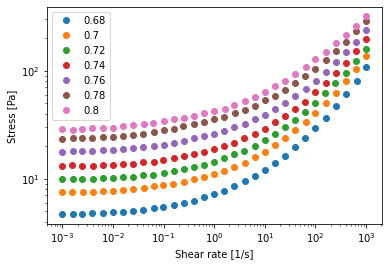

In [74]:
fig, ax=plt.subplots()

for vol_frac in np.unique(loaded_data['vol_frac']):
    condition=loaded_data['vol_frac']==vol_frac
    ax.plot(loaded_data['shearrate'][condition],loaded_data['stress'][condition],'o', label=str(vol_frac))
    
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Shear rate [1/s]')
ax.set_ylabel('Stress [Pa]')

plt.legend()

# Conclusion

Altair provides a declarative lenguage to explore data and defines a schema to store data and visualization instruction in a json file.

The altair renderer interpret the data and visualization instruction in the json and provides the figure

From the json we can retrieve the data and, for example, reproduce the figure in matplolib 

The Altair schema seems a good standard to adopt to share data from digitized literature data